$\textbf{1.}$ What is the minimizer and minimum function value of f(x) and g(x) ? Are both the function convex ? Explain



$\textbf{ Function f(x)}$

The function is given by:
$ f(x) = x_1^2 + x_2^2 + 9 $

$\nabla f(x) = \begin{bmatrix} 2x_1 \\ 2x_2 \end{bmatrix} $

Equating Gradient equal to zero :

$\textbf{Minimizer and minimum value}$

For f(x) , the minimizer is $ x = [0, 0] $ and the minimum function value is 9.

$\textbf{Convexity}$

The function \( f(x) \) is convex because it is a quadratic function.

$\rule{30cm}{2pt}$

$\textbf {Function  g(x)} $

The function is given by:
$ g(x) = \sum_{i=1}^{n} \frac{1}{P(i)}(x_i - {i^2})^2 $


$\textbf{Minimizer and minimum value}$
For g(x) , assuming  n  is finite:
 $$
   g(x) = \sum_{i=1}^{n} \frac{(x_i - i^2)^2}{P(i)}
   $$
   - $\frac{\partial g}{\partial x}$= $\frac{2(x_i - i^2)}{P(i)} = 0$
   - Solving for $x_i$: $x_i = i^2$ for all $i$
   - Minimizer: $x_i = i^2$ for all $i$
   - Minimum Value: $g(x) = 0$
1. **For $g(x)$:**
   $$ g(x) = \sum_{i=1}^{n} \frac{(x_i - i^2)^2}{P(i)} $$

   Given values: $P(1) = \frac{1}{16}$, $P(2) = \frac{1}{256}$, $P(3) = \frac{1}{4}$, $P(4) = \frac{1}{64}$

   The Hessian matrix is:
   Certainly! The Hessian matrix for
g(x) is obtained by taking the second-order partial derivatives of

g(x) with respect to xi Given that P(i) is a constant for each i, the Hessian matrix Hg is as follows
​



   $$ H_g = \begin{bmatrix}
       16 & 0 & 0 & \dots & 0 \\
       0 & 256 & 0 & \dots & 0 \\
       0 & 0 & 4 & \dots & 0 \\
       \vdots & \vdots & \vdots & \ddots & \vdots \\
       0 & 0 & 0 & \dots & 64
   \end{bmatrix} $$

   Since the Hessian matrix $H_g$ is positive definite (all diagonal entries are positive), $g(x)$ is convex.
$\rule{30cm}{3pt}$

$\textbf{2.}$ Implement Gradient Descent with the exact line search for f(x) and also implement Newton’s Method (From
LAB-01) for f(x). Note down the time taken, number of iterations required for convergence, record the final
minimizer, final objective function value for both the implementations. Provide observations on the results, and
comment on the minimizers and objective function values so obtained. Plot the level sets of the function f(x)
and also plot the trajectory of the optimization on the same plot for both the implementations and report your
observations. (Take τ = 10−15, x0 = (1000, −1000).)

In [ ]:
import numpy as np
import time

def f(x):
    return x[0]**2 + x[1]**2 + 9

def gradient_f(x):
    return np.array([2 * x[0], 2 * x[1]])

def exact_line_search(x, gradient):
    alpha = np.dot(gradient, gradient) / np.dot(gradient, gradient_f(gradient))
    return alpha

def gradient_descent_exact_line_search(x0, tolerance=1e-15, max_iterations=1000):
    x = np.array(x0)
    iterations = 0
    start_time = time.time()

    while np.linalg.norm(gradient_f(x)) > tolerance and iterations < max_iterations:
        alpha = exact_line_search(x, -gradient_f(x))
        x = x + alpha * (-gradient_f(x))
        iterations += 1

    end_time = time.time()
    elapsed_time = end_time - start_time

    return {
        'minimizer': x,
        'minimized_value': f(x),
        'iterations': iterations,
        'elapsed_time': elapsed_time
    }

# Initial point
x0 = [1000, -1000]

# Run gradient descent with exact line search
result = gradient_descent_exact_line_search(x0)

# Display results
print("Minimizer:", result['minimizer'])
print("Final Objective Function Value:", result['minimized_value'])
print("Number of Iterations:", result['iterations'])
print("Time Taken:", result['elapsed_time'], "seconds")


Minimizer: [0. 0.]
Final Objective Function Value: 9.0
Number of Iterations: 1
Time Taken: 0.0001621246337890625 seconds


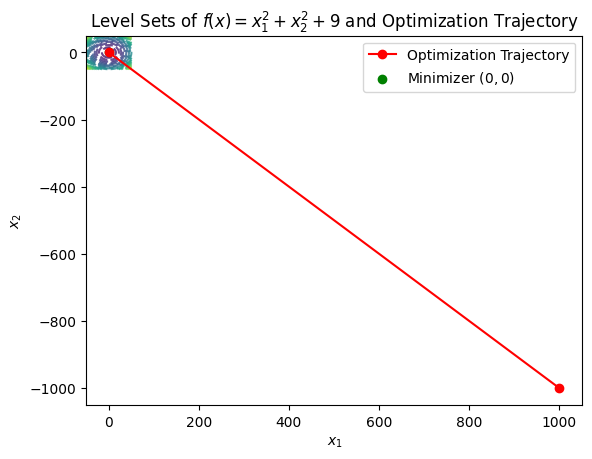

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x[0]**2 + x[1]**2 + 9

def gradient_f(x):
    return np.array([2 * x[0], 2 * x[1]])

def exact_line_search(x, gradient):
    alpha = np.dot(gradient, gradient) / np.dot(gradient, gradient_f(gradient))
    return alpha

def gradient_descent_exact_line_search1(x0, tolerance=1e-15, max_iterations=1000):
    x = np.array(x0)
    trajectory = [x.copy()]

    iterations = 0
    while np.linalg.norm(gradient_f(x)) > tolerance and iterations < max_iterations:
        alpha = exact_line_search(x, -gradient_f(x))
        x = x + alpha * (-gradient_f(x))
        trajectory.append(x.copy())
        iterations += 1

    return np.array(trajectory)

# Initial point
x0 = [1000, -1000]

# Run gradient descent with exact line search
trajectory = gradient_descent_exact_line_search1(x0)

# Generate level sets
x = np.linspace(-50, 50, 100)
y = np.linspace(-50, 50, 100)
X, Y = np.meshgrid(x, y)
Z = X**2 + Y**2 + 9

# Plot level sets
plt.contour(X, Y, Z, levels=20, cmap='viridis', alpha=0.8, linestyles='dashed')
plt.title('Level Sets of $f(x) = x_1^2 + x_2^2 + 9$ and Optimization Trajectory')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

# Plot trajectory
plt.plot(trajectory[:, 0], trajectory[:, 1], marker='o', color='red', label='Optimization Trajectory')

# Highlight the final minimizer
plt.scatter(0, 0, color='green', label='Minimizer $(0, 0)$')

plt.legend()
plt.show()


$\textbf{3.}$ For n ∈ {2, 20, 200, 2000, 5000, 10000, 15000, 20000, 30000, 50000, 100000, 200000} Implement Gradient Descent
with the exact line search for g(x) and also implement Newton’s Method (From LAB-01) for g(x). Note down
the time taken, number of iterations required for convergence, record the final minimizer, final objective function
value for both the implementations. Provide observations on the results, and comment on the minimizers and
objective function values so obtained. Only for n = 2 plot the level sets of the function g(x) and also plot
the trajectory of the optimization on the same plot for both the implementations and report your observations.
(Take τ = 10−15, x0 = (1, 2, 3, ....., n).)

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar

# Define the periodic function P(y)
def P(y):
    return 1 / (4 ** (y // 4))

# Objective function g(x)
def g(x):
    n = len(x)
    result = 0
    for i in range(n):
        result += (1 / P(i )) *(x[i] - i**2) ** 2
    return result

# Gradient of g(x)
def grad_g(x):
    n = len(x)
    gradient = np.zeros(n)
    for i in range(n):
        gradient[i] = 2 * (x[i] - i**2) / P(i)
    return gradient

# Hessian of g(x)
def hessian_g(x):
    n = len(x)
    hessian = np.zeros((n, n))
    for i in range(n):
        hessian[i, i] = 2 / P(i)
    return hessian

# Gradient Descent with Exact Line Search
def gradient_descent_exact_line_search_g(x0, tol=1e-15, max_iter=1000):
    x = x0
    iterations = 0

    while iterations < max_iter:
        gradient = grad_g(x)
        alpha = minimize_scalar(lambda a: g(x - a * gradient)).x
        x = x - alpha * gradient
        iterations += 1

        if np.linalg.norm(gradient) < tol:
            break

    return x, g(x), iterations

# Newton's Method
def newtons_method_g(x0, tol=1e-15, max_iter=1000):
    x = x0
    iterations = 0

    while iterations < max_iter:
        gradient = grad_g(x)
        hessian = hessian_g(x)

        # Check if Hessian is invertible
        if np.linalg.det(hessian) == 0:
            break

        direction = -np.linalg.inv(hessian).dot(gradient)
        x = x + direction
        iterations += 1

        if np.linalg.norm(gradient) < tol:
            break

    return x, g(x), iterations

# Initial values
n_values = [2, 20, 200, 2000,5000,10000,20000]

for n in n_values:
    x0 = np.arange(1, n + 1)

    # Gradient Descent with Exact Line Search
    start_time = time.time()
    minimizer_gd, min_val_gd, iter_gd = gradient_descent_exact_line_search_g(x0)
    gd_time = time.time() - start_time

    # Newton's Method
    start_time = time.time()
    minimizer_newton, min_val_newton, iter_newton = newtons_method_g(x0)
    newton_time = time.time() - start_time

    # Print results
    print(f"\nFor n = {n}:")
    print("Gradient Descent:")
    print("Time taken:", gd_time)
    print("Number of iterations:", iter_gd)
    print("Minimizer:", minimizer_gd)
    print("Final objective function value:", min_val_gd)

    print("\nNewton's Method:")
    print("Time taken:", newton_time)
    print("Number of iterations:", iter_newton)
    print("Minimizer:", minimizer_newton)
    print("Final objective function value:", min_val_newton)



For n = 2:
Gradient Descent:
Time taken: 0.0009176731109619141
Number of iterations: 2
Minimizer: [0. 1.]
Final objective function value: 0.0

Newton's Method:
Time taken: 0.003940105438232422
Number of iterations: 2
Minimizer: [0. 1.]
Final objective function value: 0.0

For n = 20:
Gradient Descent:
Time taken: 1.0133283138275146
Number of iterations: 1000
Minimizer: [5.09624055e-07 1.00000051e+00 3.99999949e+00 8.99999745e+00
 1.60000000e+01 2.50000000e+01 3.60000000e+01 4.90000000e+01
 6.40000000e+01 8.10000000e+01 1.00000000e+02 1.21000000e+02
 1.44000000e+02 1.69000000e+02 1.96000000e+02 2.25000000e+02
 2.56000000e+02 2.89000000e+02 3.24000000e+02 3.61000000e+02]
Final objective function value: 7.419667534702722e-12

Newton's Method:
Time taken: 0.0021734237670898438
Number of iterations: 2
Minimizer: [  0.   1.   4.   9.  16.  25.  36.  49.  64.  81. 100. 121. 144. 169.
 196. 225. 256. 289. 324. 361.]
Final objective function value: 0.0

For n = 200:
Gradient Descent:
Time take

<ipython-input-19-1c4378825a90>:14: RuntimeWarning: overflow encountered in double_scalars
  result += (1 / P(i )) *(x[i] - i**2) ** 2



For n = 2000:
Gradient Descent:
Time taken: 22.96792221069336
Number of iterations: 1000
Minimizer: [1.000e+00 2.000e+00 3.000e+00 ... 1.998e+03 1.999e+03 2.000e+03]
Final objective function value: inf

Newton's Method:
Time taken: 4.058487176895142
Number of iterations: 2
Minimizer: [0.000000e+00 1.000000e+00 4.000000e+00 ... 3.988009e+06 3.992004e+06
 3.996001e+06]
Final objective function value: 0.0


<ipython-input-19-1c4378825a90>:22: RuntimeWarning: overflow encountered in divide
  gradient[i] = 2 * (x[i] - i**2) / P(i)
<ipython-input-19-1c4378825a90>:22: RuntimeWarning: divide by zero encountered in divide
  gradient[i] = 2 * (x[i] - i**2) / P(i)
<ipython-input-19-1c4378825a90>:40: RuntimeWarning: invalid value encountered in multiply
  alpha = minimize_scalar(lambda a: g(x - a * gradient)).x


ZeroDivisionError: float division by zero

In [ ]:
# Crash at n=5000